Installing few required modules

In [1]:
pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install scattertext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install indexer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached indexer-0.6.2.tar.gz (14 kB)
ERROR: Could not find a version that satisfies the requirement indexer (from versions: 0.6.2)
ERROR: No matching distribution found for indexer


**Importing required libraries and data**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
import plotly as py
import cufflinks as cf
from plotly.offline import iplot
import plotly.graph_objs as go
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import spacy
import scattertext as st
import IPython


# For Deep Learning Models
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, RNN, Bidirectional,GlobalMaxPool1D,BatchNormalization

In [5]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [6]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('stopwords')
nltk.download('brown')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
# importing the datasets

imdb_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IMDB data/Train.csv")
imdb_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IMDB data/Test.csv")
imdb_valid = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IMDB data/Valid.csv")

In [8]:
imdb_train

text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      Im a die hard Dads Army fan and nothing will e...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[40000 rows x 2 columns]

In [9]:
imdb_train["label"].value_counts()

0    20019
1    19981
Name: label, dtype: int64

 **1.Perform required text pre-processing –lowering text, removing URLs, punctuation , stop words and correct spelling .**

**2.Perform tokenization and lemmatization on cleaned data .**

### **Text Cleaning**

In [10]:
import contractions
imdb_train["text"] = imdb_train["text"].apply(lambda x: contractions.fix(x))
imdb_train

text  label
0      I grew up (b. 1965) watching and loving the Th...      0
1      When I put this movie in my DVD player, and sa...      0
2      Why do people who do not know what a particula...      0
3      Even though I have great interest in Biblical ...      0
4      I Am a die hard Dads Army fan and nothing will...      1
...                                                  ...    ...
39995  "Western Union" is something of a forgotten cl...      1
39996  This movie is an incredible piece of work. It ...      1
39997  My wife and I watched this movie because we pl...      0
39998  When I first watched Flatliners, I was amazed....      1
39999  Why would this film be so good, but only gross...      1

[40000 rows x 2 columns]

Implementing step 1 & 2

In [11]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob

stopwords = set(stopwords.words("english")) 

def text_preprocess_pipeline(corpus):
  corpus['text'] = corpus['text'].str.lower()
  corpus['text'] = corpus['text'].str.replace(r"https\S+",'', regex = True)
  corpus['text'] = corpus['text'].str.replace('[^A-Za-z0-9]+',' ', regex = True)
  corpus['text'] = corpus['text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
  # corpus['text'] = corpus['text'].apply(lambda x: str(TextBlob(x).correct()))
  # above code is commented because it takes a lot of time to process the given data

  return corpus
imdb_train = text_preprocess_pipeline(imdb_train)
imdb_test = text_preprocess_pipeline(imdb_test)
imdb_vaid = text_preprocess_pipeline(imdb_valid)


In [12]:
imdb_train.head()

text  label
0  grew b 1965 watching loving thunderbirds mates...      0
1  put movie dvd player sat coke chips expectatio...      0
2  people know particular time past like feel nee...      0
3  even though great interest biblical movies bor...      0
4  die hard dads army fan nothing ever change got...      1

In [13]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def clean_text(text):

  # tokenization and lemmatization
  text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
  text = [lemmatizer.lemmatize(token, "v") for token in text]

  # joining back all the tokens to form a text
  text = " ".join(text)

  pattern=(r"[(br)]")
  text=re.sub(pattern,'',text)

  return text

imdb_train['lemmatized_text'] = imdb_train['text'].apply(lambda x: clean_text(x))
imdb_test['lemmatized_text'] = imdb_test['text'].apply(lambda x: clean_text(x))
imdb_valid['lemmatized_text'] = imdb_valid['text'].apply(lambda x: clean_text(x))

imdb_train.head()

text  label  \
0  grew b 1965 watching loving thunderbirds mates...      0   
1  put movie dvd player sat coke chips expectatio...      0   
2  people know particular time past like feel nee...      0   
3  even though great interest biblical movies bor...      0   
4  die hard dads army fan nothing ever change got...      1   

                                     lemmatized_text  
0  gow  1965 watch love thundeid mate school watc...  
1  put movie dvd playe sit coke chip expectation ...  
2  people know paticula time past like feel need ...  
3  even though geat inteest ilical movie oe death...  
4  die had dad amy fan nothing eve change get tap...

**3.Visualize the most frequent words and bigrams**

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from yellowbrick.text import FreqDistVisualizer

def cv(data, ngram, MAX_NB_WORDS = 75000):
    count_vectorizer = CountVectorizer(ngram_range = (ngram, ngram), max_features = MAX_NB_WORDS)
    emb = count_vectorizer.fit_transform(data).toarray()
    print("count vectorize with", str(np.array(emb).shape[1]), "features")
    return emb, count_vectorizer

def print_out(emb, feat, ngram, compared_sentence=0):
    print(ngram,"bag-of-words: ")
    print(feat.get_feature_names(), "\n")
    print(ngram,"bag-of-feature: ")
    print(test_cv_1gram.vocabulary_, "\n")
    print("BoW matrix:")
    print(pd.DataFrame(emb.transpose(), index = feat.get_feature_names()).head(), "\n")
    print(ngram,"vector example:")
    print(imdb_train["lemmatized_text"][compared_sentence])
    print(emb[compared_sentence], "\n")
    
test_corpus = imdb_train["lemmatized_text"][:1].tolist()
print("Printing the 1st instance as an example: \n")
print("The test corpus: ", test_corpus, "\n")

test_cv_em_1gram, test_cv_1gram = cv(test_corpus, ngram=1)
print_out(test_cv_em_1gram, test_cv_1gram, ngram="Uni-gram")

Printing the 1st instance as an example: 

The test corpus:  ['gow  1965 watch love thundeid mate school watch play thundeid school lunch school want vigil scott one want alan count 5 ecome at fom take child see movie hop would get glimpse love child ittely disappoint high point snappy theme tune could compae oiginal scoe thundeid thankfully ealy satuday moning one television channel still play eun seies gey andeson wife ceate jonatha fakes hand diecto chai vesion completely hopeless waste film utte uish cgi emake may acceptale eplace maionette homo sapiens susp sapiens huge eo judgment'] 

count vectorize with 74 features
Uni-gram bag-of-words: 
['1965', 'acceptale', 'alan', 'andeson', 'at', 'ceate', 'cgi', 'chai', 'channel', 'child', 'compae', 'completely', 'could', 'count', 'diecto', 'disappoint', 'ealy', 'ecome', 'emake', 'eo', 'eplace', 'eun', 'fakes', 'film', 'fom', 'get', 'gey', 'glimpse', 'gow', 'hand', 'high', 'homo', 'hop', 'hopeless', 'huge', 'ittely', 'jonatha', 'judgment',

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [15]:
test_cv_em_2gram, test_cv_2gram = cv(test_corpus, ngram=2)
print_out(test_cv_em_2gram, test_cv_2gram, ngram="Bi-gram")

count vectorize with 84 features
Bi-gram bag-of-words: 
['1965 watch', 'acceptale eplace', 'alan count', 'andeson wife', 'at fom', 'ceate jonatha', 'cgi emake', 'chai vesion', 'channel still', 'child ittely', 'child see', 'compae oiginal', 'completely hopeless', 'could compae', 'count ecome', 'diecto chai', 'disappoint high', 'ealy satuday', 'ecome at', 'emake may', 'eo judgment', 'eplace maionette', 'eun seies', 'fakes hand', 'film utte', 'fom take', 'get glimpse', 'gey andeson', 'glimpse love', 'gow 1965', 'hand diecto', 'high point', 'homo sapiens', 'hop would', 'hopeless waste', 'huge eo', 'ittely disappoint', 'jonatha fakes', 'love child', 'love thundeid', 'lunch school', 'maionette homo', 'mate school', 'may acceptale', 'moning one', 'movie hop', 'oiginal scoe', 'one television', 'one want', 'play eun', 'play thundeid', 'point snappy', 'sapiens huge', 'sapiens susp', 'satuday moning', 'school lunch', 'school want', 'school watch', 'scoe thundeid', 'scott one', 'see movie', 'seies

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [16]:
def get_top_n_frequent_words(x, n=None):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [17]:
freq_words = get_top_n_frequent_words(imdb_train["lemmatized_text"])
freq_words_df = pd.DataFrame(freq_words, columns = ['Unigram Text' , 'Count'])
freq_words_df.head(10)

Unigram Text  Count
0        movie  82819
1         film  76717
2         make  37986
3         like  35623
4         time  25680
5         good  24013
6      chaacte  22744
7        watch  22291
8         stoy  20215
9        think  19935

[10100, 9733, 4685, 4347, 3182, 2952, 2880, 2834, 2545, 2492]

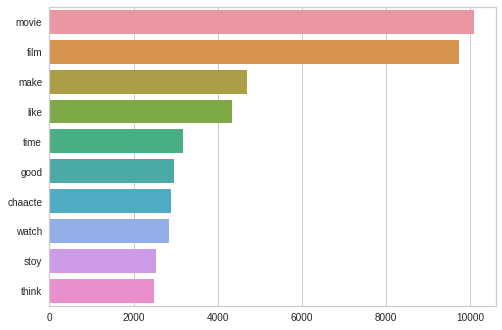

In [18]:
# Visualising the most frequent unigrams in the tweets i.e; top 10 
top_unigrams = get_top_n_frequent_words(imdb_test["lemmatized_text"],10)
x,y = map(list,zip(*top_unigrams))
sns.barplot(x = y,y = x)
display(y)

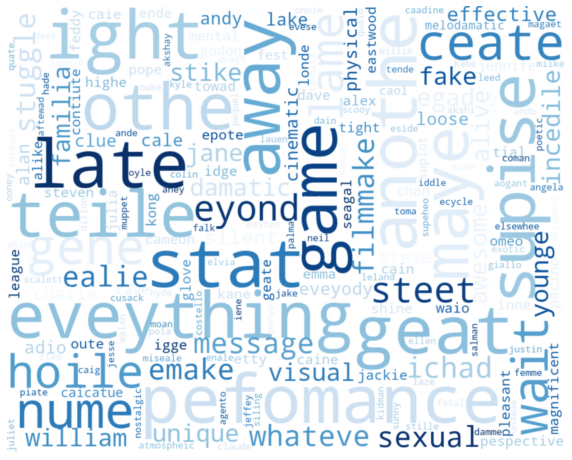

In [19]:
# Visualizing for unigram text
word_cloud = WordCloud(width = 1000,
                       height = 800,
                       colormap = 'Blues', 
                       margin = 0,
                       max_words = 200,  
                       min_word_length = 4,
                       max_font_size = 120, min_font_size = 15,  
                       background_color = "white").generate(" ".join(freq_words_df['Unigram Text']))

plt.figure(figsize = (10, 15))
plt.imshow(word_cloud, interpolation = "gaussian")
plt.axis("off")
plt.show()

For Bigrams

In [20]:
def get_top_n_bigram(x, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [21]:
bigram_words = get_top_n_bigram(imdb_train["lemmatized_text"])
bigram_words_df = pd.DataFrame(bigram_words,columns=['Bigram words','count'])
bigram_words_df.head(10)

Bigram words  count
0       look like   3120
1       film make   2607
2     watch movie   2555
3      movie make   2019
4      make movie   1998
5         yea old   1870
6  special effect   1847
7      movie like   1783
8       make film   1665
9       movie eve   1620

[351, 328, 309, 260, 247, 231, 230, 207, 205, 198]

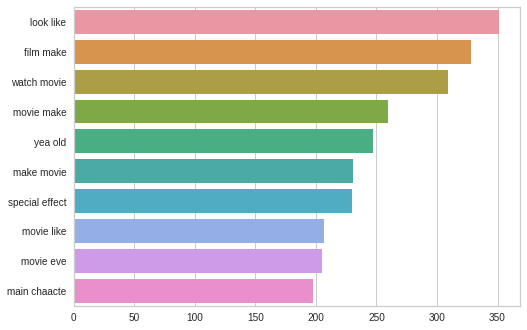

In [22]:
# Visualising the most frequent Bigrams in the tweets i.e; top 10 
top_unigrams = get_top_n_bigram(imdb_test["lemmatized_text"],10)
x,y = map(list,zip(*top_unigrams))
sns.barplot(x = y,y = x)
display(y)

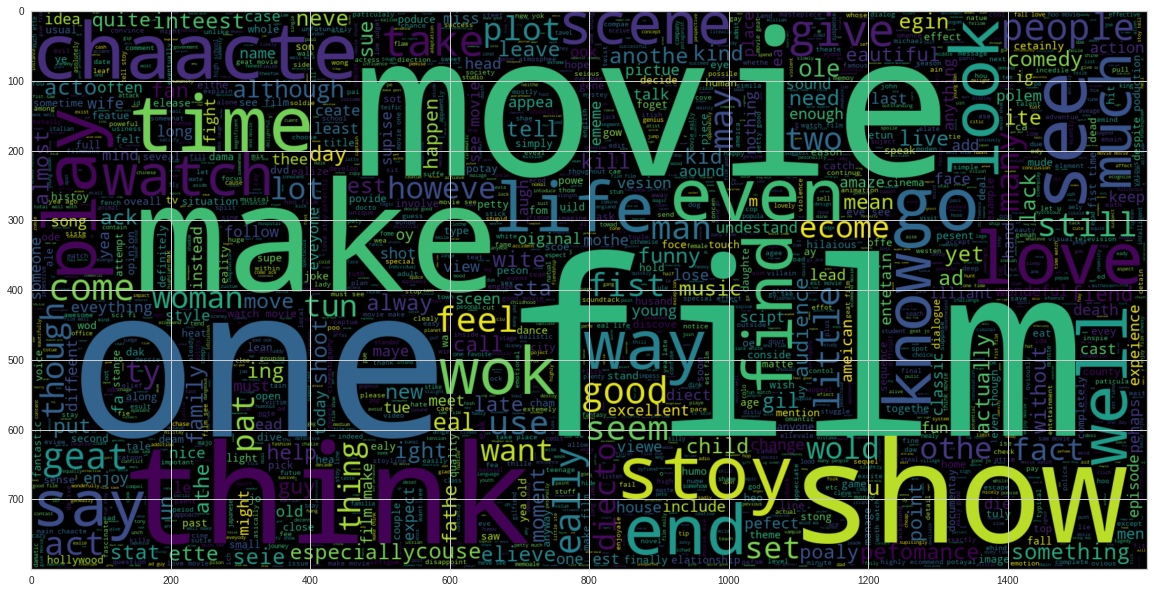

In [23]:
from wordcloud import WordCloud

# Visualizing for entire text
plt.figure(figsize = (20,20)) 
wc = WordCloud(
    max_words = 2000 ,
    width = 1600 ,
    height = 800).generate(" ".join(imdb_train[imdb_train.label == 1].lemmatized_text))
    
plt.imshow(wc , interpolation = 'bilinear')

**4.Visualize the practical words that represent positive and negative sentiment in the dataset.**

In [24]:
from textblob import TextBlob

imdb_train['polarity'] = imdb_train['lemmatized_text'].apply(lambda x: TextBlob(x).sentiment.polarity)
imdb_train['review_len'] = imdb_train['lemmatized_text'].apply(lambda x:len(x))
imdb_train['word_count'] = imdb_train['lemmatized_text'].apply(lambda x: len(x.split()))

imdb_train.head()

text  label  \
0  grew b 1965 watching loving thunderbirds mates...      0   
1  put movie dvd player sat coke chips expectatio...      0   
2  people know particular time past like feel nee...      0   
3  even though great interest biblical movies bor...      0   
4  die hard dads army fan nothing ever change got...      1   

                                     lemmatized_text  polarity  review_len  \
0  gow  1965 watch love thundeid mate school watc...  0.243333         530   
1  put movie dvd playe sit coke chip expectation ...  0.173753         982   
2  people know paticula time past like feel need ... -0.116667         563   
3  even though geat inteest ilical movie oe death... -0.050000         184   
4  die had dad amy fan nothing eve change get tap...  0.090909         575   

   word_count  
0          86  
1         157  
2          96  
3          33  
4         100

Distribution of Sentiment Polarity

In [25]:
imdb_train['polarity'].iplot(
    kind='hist',
    bins=50,
    xTitle='polarity',
    yTitle='count',
    title='Sentiment Polarity Distribution')

In [26]:
nlp = spacy.load('en_core_web_sm')
imdb_train['parsed'] = imdb_train.lemmatized_text[:1000].apply(nlp)

corpus_data = imdb_train.copy()
corpus_data["label"] = corpus_data["label"].astype(str)
corpus_viz = st.CorpusFromParsedDocuments(corpus_data.iloc[:1000,:],
                             category_col='label',
                             parsed_col='parsed').build()


html = st.produce_scattertext_explorer(corpus_viz,
          category='1',
          category_name='1',
          not_category_name='0',
          width_in_pixels=700,
          minimum_term_frequency=15,
          term_significance = st.LogOddsRatioUninformativeDirichletPrior(),
)

In [27]:
file_name = 'terms_pair1.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IPython.display.HTML(filename=file_name)

**5.Create  an  embedding  layer  and  build  a  15  layer  LSTM and  a 20  layer  BidRNN  for predicting the sentiment.**

*Tokenizing & Padding the text*

In [28]:
# Maximum features in a reviews
max_feat = 6000
embed_size=128

tokenizer = Tokenizer(num_words=max_feat)
tokenizer.fit_on_texts(imdb_train["lemmatized_text"])
list_tokenized_train = tokenizer.texts_to_sequences(imdb_train["lemmatized_text"])
list_tokenized_valid = tokenizer.texts_to_sequences(imdb_valid["lemmatized_text"])
list_tokenized_test = tokenizer.texts_to_sequences(imdb_test["lemmatized_text"])

X_valid = pad_sequences(list_tokenized_valid, maxlen=130)
y_valid = imdb_valid['label']

X_test = pad_sequences(list_tokenized_test, maxlen=130)
y_test = imdb_test['label']

X_train = pad_sequences(list_tokenized_train, maxlen=130)
y_train = imdb_train['label']

# Function to pass Validation Data
def valid_gen():
  return X_valid, y_valid

**Model-1**

LSTM with 15 layers

In [40]:
# Deep Learning Model with LSTM Layers
model = keras.Sequential()
model.add(Embedding(max_feat,embed_size))
for i in range(1,16):
  model.add(LSTM(20, return_sequences=True))
  model.add(Dropout(0.6))
model.add(GlobalMaxPool1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

batch_size = 200
epochs = 20
hist_lstm = model.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=valid_gen())


Epoch 1/20
200/200 [==============================] - 38s 101ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6931 - val_accuracy: 0.5028
Epoch 2/20
200/200 [==============================] - 15s 74ms/step - loss: 0.6825 - accuracy: 0.5310 - val_loss: 0.6379 - val_accuracy: 0.7290
Epoch 3/20
200/200 [==============================] - 15s 75ms/step - loss: 0.5174 - accuracy: 0.7577 - val_loss: 0.5288 - val_accuracy: 0.8020
Epoch 4/20
200/200 [==============================] - 15s 74ms/step - loss: 0.4328 - accuracy: 0.8101 - val_loss: 0.5021 - val_accuracy: 0.8084
Epoch 5/20
200/200 [==============================] - 16s 80ms/step - loss: 0.3971 - accuracy: 0.8314 - val_loss: 0.4730 - val_accuracy: 0.8294
Epoch 6/20
200/200 [==============================] - 15s 75ms/step - loss: 0.3815 - accuracy: 0.8445 - val_loss: 0.4678 - val_accuracy: 0.8204
Epoch 7/20
200/200 [==============================] - 15s 74ms/step - loss: 0.3619 - accuracy: 0.8538 - val_loss: 0.4585 - val_accuracy

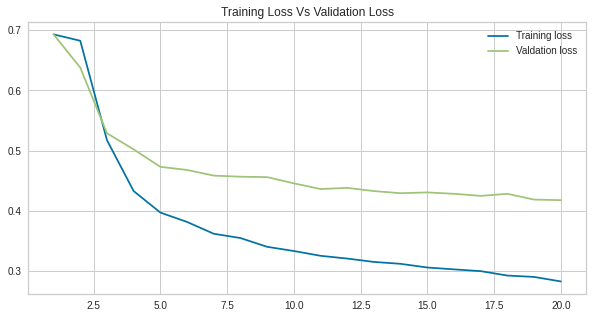

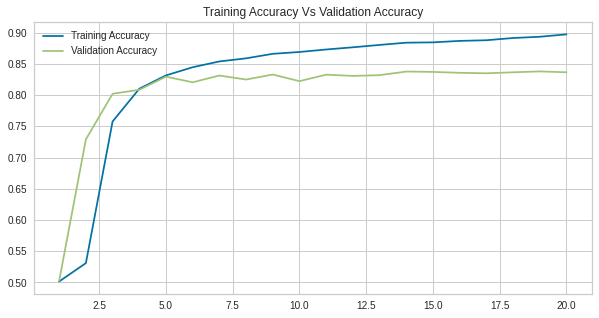

In [41]:
loss = hist_lstm.history['loss']
acc = hist_lstm.history['accuracy']
val_loss = hist_lstm.history['val_loss']
val_acc = hist_lstm.history['val_accuracy']

epochs = range(1, len(loss)+1)
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Valdation loss')
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title("Training Accuracy Vs Validation Accuracy")
plt.legend()
plt.show()

In [42]:
# Test accuracy
model.evaluate(X_test,y_test)

157/157 [==============================] - 10s 31ms/step - loss: 0.4048 - accuracy: 0.8478


[0.4048008322715759, 0.8478000164031982]

**Model-2**

Bi-directional RNN with 20 layers

In [33]:
# Maximum features in a reviews
max_feat = 6000
embed_size=128

model2 = keras.Sequential()
model2.add(Embedding(max_feat,embed_size))
for i in range(1,21):
  model2.add(Bidirectional(LSTM(20, return_sequences=True)))
  model2.add(Dropout(0.6))
model2.add(GlobalMaxPool1D())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation="sigmoid"))
model2.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

batch_size = 200
epochs = 20
hist_bidrnn = model2.fit(X_train,y_train, batch_size=batch_size, epochs=epochs, validation_data=valid_gen())


Epoch 1/20
200/200 [==============================] - 107s 277ms/step - loss: 0.6095 - accuracy: 0.6204 - val_loss: 0.5217 - val_accuracy: 0.8510
Epoch 2/20
200/200 [==============================] - 39s 195ms/step - loss: 0.3421 - accuracy: 0.8672 - val_loss: 0.4755 - val_accuracy: 0.8722
Epoch 3/20
200/200 [==============================] - 38s 190ms/step - loss: 0.2849 - accuracy: 0.8944 - val_loss: 0.4056 - val_accuracy: 0.8774
Epoch 4/20
200/200 [==============================] - 38s 190ms/step - loss: 0.2615 - accuracy: 0.9065 - val_loss: 0.3943 - val_accuracy: 0.8662
Epoch 5/20
200/200 [==============================] - 38s 190ms/step - loss: 0.2438 - accuracy: 0.9127 - val_loss: 0.3842 - val_accuracy: 0.8780
Epoch 6/20
200/200 [==============================] - 39s 197ms/step - loss: 0.2319 - accuracy: 0.9187 - val_loss: 0.3725 - val_accuracy: 0.8722
Epoch 7/20
200/200 [==============================] - 38s 191ms/step - loss: 0.2199 - accuracy: 0.9245 - val_loss: 0.3732 - val_a

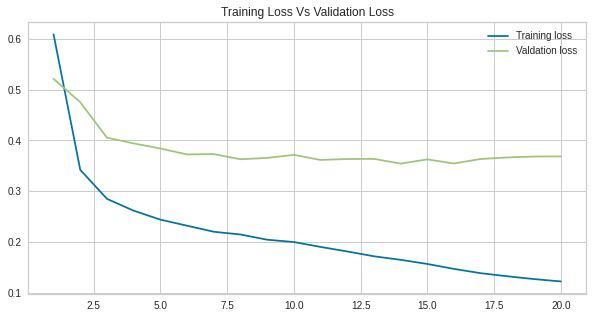

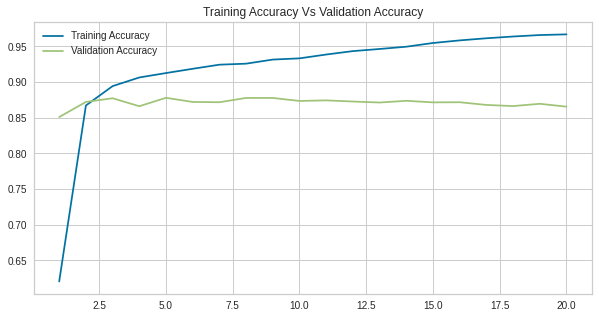

In [34]:
loss = hist_bidrnn.history['loss']
acc = hist_bidrnn.history['accuracy']
val_loss = hist_bidrnn.history['val_loss']
val_acc = hist_bidrnn.history['val_accuracy']

epochs = range(1, len(loss)+1)
plt.figure(figsize=(10,5))
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Valdation loss')
plt.title("Training Loss Vs Validation Loss")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.title("Training Accuracy Vs Validation Accuracy")
plt.legend()
plt.show()

In [35]:
# Test accuracy
model2.evaluate(X_test,y_test)

157/157 [==============================] - 28s 81ms/step - loss: 0.3573 - accuracy: 0.8710


[0.357320100069046, 0.8709999918937683]

**6.Build your own test dataset with 10 moviereviews and tabulate accuracy.**

In [45]:
reviews = {
  "The movie is good and graphics are also pretty descent, kudos to the makers!. Worth watching":1,
  "It was pretty boring, such a waste of time":0,
  "Don’t be fooled by the title for if you crave misery, injustice, sadness, and suicidal depression this film is all about that and nothing else.":0,
  "I only made it through about 20 minutes but that was enough to convince me it’s the ickiest movie.":0,
  "I loved the movie far more than i should have, not that doesn't mean it is perfect":1,
  "If you can keep both eyes open through its whole three-hour length you're a better man than I am.":0,
  "It is the rare movie that succeeds on every level":1,
  "It doesn't matter how much you enjoy film, you're better off saving your money, popcorn and time, such a waste":0,
  "I can’t stop telling people to watch this movie.":1,
  "Impossibly good movie.":1
}
df = pd.DataFrame(list(reviews.items()),columns=["text","label"])
display(df)

text  label
0  The movie is good and graphics are also pretty...      1
1         It was pretty boring, such a waste of time      0
2  Don’t be fooled by the title for if you crave ...      0
3  I only made it through about 20 minutes but th...      0
4  I loved the movie far more than i should have,...      1
5  If you can keep both eyes open through its who...      0
6  It is the rare movie that succeeds on every level      1
7  It doesn't matter how much you enjoy film, you...      0
8   I can’t stop telling people to watch this movie.      1
9                             Impossibly good movie.      1

In [46]:
df = text_preprocess_pipeline(df)
df['lemmatized_text'] = df['text'].apply(lambda x: clean_text(x))
display(df)
list_tokenized_testing = tokenizer.texts_to_sequences(df["lemmatized_text"])


x_testing = pad_sequences(list_tokenized_testing, maxlen=130)
y_testing = df['label']

text  label  \
0  movie good graphics also pretty descent kudos ...      1   
1                           pretty boring waste time      0   
2  fooled title crave misery injustice sadness su...      0   
3      made 20 minutes enough convince ickiest movie      0   
4                       loved movie far mean perfect      1   
5  keep eyes open whole three hour length better man      0   
6                    rare movie succeeds every level      1   
7  matter much enjoy film better saving money pop...      0   
8                    stop telling people watch movie      1   
9                              impossibly good movie      1   

                                     lemmatized_text  
0  movie good gaphic also petty descent kudos mak...  
1                                petty oe waste time  
2  fool title cave misey injustice sadness suicid...  
3       make 20 minute enough convince ickiest movie  
4                          love movie fa mean pefect  
5       keep eye open whole thee hou length ette man  
6                        ae movie succeed evey level  
7  matte much enjoy film ette save money popcon t...  
8                       stop tell people watch movie  
9                               impossily good movie

In [47]:
model.evaluate(x_testing,y_testing)

1/1 [==============================] - 0s 62ms/step - loss: 0.6938 - accuracy: 0.5000


[0.6938238143920898, 0.5]

In [48]:
model2.evaluate(x_testing,y_testing)

1/1 [==============================] - 0s 123ms/step - loss: 0.4195 - accuracy: 0.9000


[0.4194520115852356, 0.8999999761581421]

**Performance:**

Bi-directional RNN model is performing a lot better than the LSTM model.